In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
type(df)

pandas.core.frame.DataFrame

# Week 1:
# 1.Performing descriptive analysis of dataset¶

In [6]:
df.count().values

array([768, 768, 768, 768, 768, 768, 768, 768, 768])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# nan values are not there but according to given conditiion value 0 in Glucose,SkinThickness,Insulin,BMI,BloodPressure are null values.

# 1.2 Visually explore these variables using histograms. Treat the missing values accordingly.
# 1.3 There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.¶¶

In [14]:
df['Glucose'].value_counts()

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

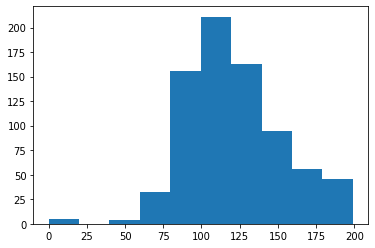

In [15]:
plt.hist(df['Glucose'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glucose', ylabel='count'>

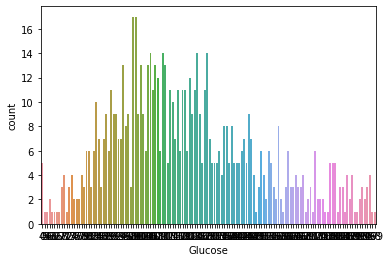

In [16]:
sns.countplot(df['Glucose'])

In [17]:
# we can remove the rows having values 0 in GLUCOSE SINCE these are too less < 30%

In [18]:
df['BloodPressure'].value_counts().head(10)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
76    39
60    37
0     35
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

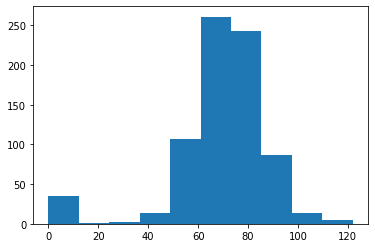

In [19]:
plt.hist(df['BloodPressure'])

In [20]:
# 0 values in blood pressure can be drop since it is rare to have 0 bp and they are <30%b
df['SkinThickness'].value_counts().head()

0     227
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

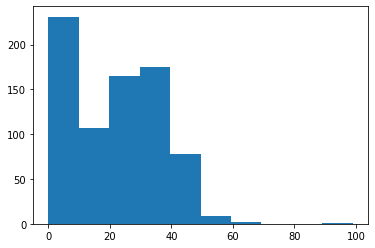

In [21]:
plt.hist(df['SkinThickness'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

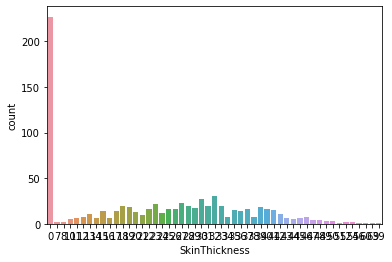

In [22]:
sns.countplot(df['SkinThickness'])

In [23]:
# we can not drop rows where value is 0 in skin thickness since they are appreciably high in numbers >30%

In [24]:
df['Insulin'].value_counts().head()

0      374
105     11
140      9
130      9
120      8
Name: Insulin, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

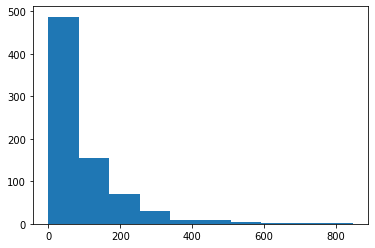

In [25]:
plt.hist(df['Insulin'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin', ylabel='count'>

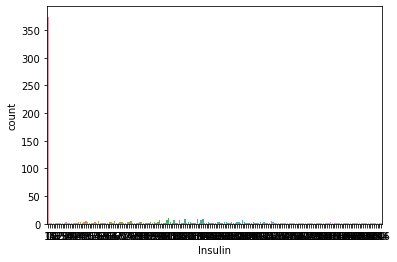

In [26]:
sns.countplot(df['Insulin'])

In [27]:
# we can not remove since value 0 is in large no. and insulin can be zero .

In [28]:
df['BMI'].value_counts().head()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
Name: BMI, dtype: int64

In [29]:
# we can drop rows having 0 in BMI SINCE < 30% .
# THUS Glucose, Blood Pressure,BMI ROWS WITH ZERO CAN BE DROPPED

In [30]:
df_2=df[(df.Glucose !=0)&(df.BloodPressure !=0)&(df.BMI !=0)]
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
df_2['DiabetesPedigreeFunction'].value_counts()

0.258    6
0.254    6
0.238    5
0.207    5
0.268    5
        ..
1.258    1
0.092    1
0.944    1
0.431    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 499, dtype: int64

In [32]:
df_2['Age'].value_counts().head(10)
df_2['Age'].shape

(724,)

In [33]:
df_2['Pregnancies'].value_counts()

1     131
0      99
2      96
3      72
4      65
5      55
6      46
7      42
8      36
9      28
10     22
11     10
12      9
13      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# Week 2 :
# 2.1 Check the balance of the data by plotting the count of outcomes by their value.

In [35]:
df_2_outcome_1=df_2[df_2.Outcome==1]#shows Diabetes
df_2_outcome_0=df_2[df_2.Outcome==0]#shows non Diabetes

In [36]:
df_2_outcome_1.head()
#df_2_outcome_1.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [37]:
df_2_outcome_0.head()
df_2_outcome_0.shape

(475, 9)

In [38]:
df_2_outcome_1_new=df_2_outcome_1.drop('Outcome',axis=1)
df_2_outcome_1_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53


Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

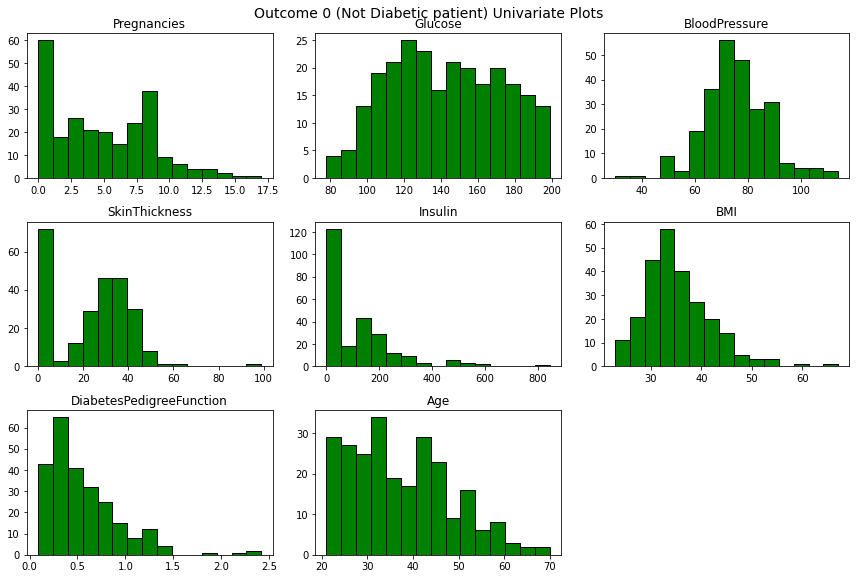

In [39]:
df_2_outcome_1_new.hist(bins=15, 
             color='Green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=10, 
             ylabelsize=10, 
             grid=False)    

plt.tight_layout(rect=(0, 0,2 , 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
              fontsize=14)

In [40]:
# Glucose,Blood Presure, skin thickness,BMI are almost having normal distribution or gaussian distribution
# age,DiabetesPedigreeFunction,insulin,Pregnancies are left skewed

In [41]:
df_2_outcome_0_new=df_2_outcome_0.drop('Outcome',axis=1)
df_2_outcome_0_new.head()
df_2_outcome_0_new.shape

(475, 8)

Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

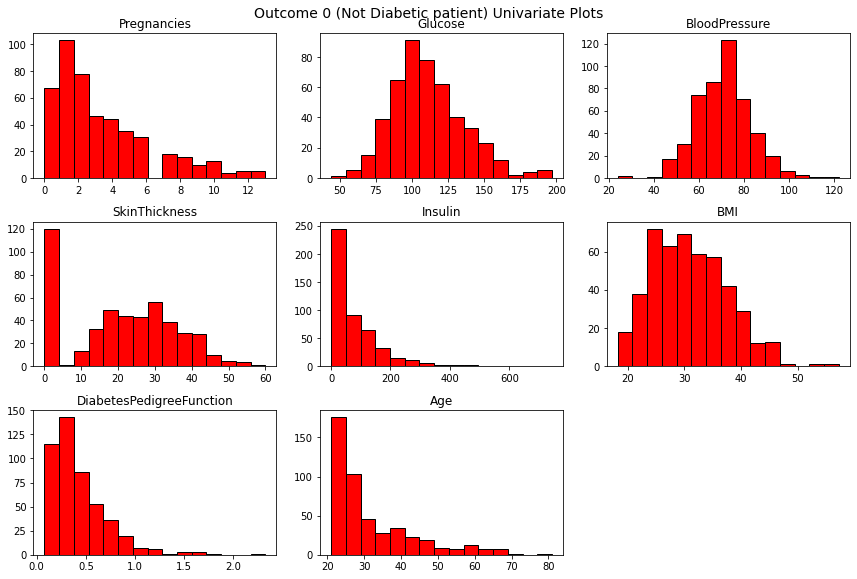

In [42]:
df_2_outcome_0_new.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,xlabelsize=10, 
             ylabelsize=10, 
             grid=False)    

plt.tight_layout(rect=(0, 0,2 , 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
              fontsize=14)

In [43]:
# age,DiabetesPedigreeFunction,insulin,pregnancies are left skewed 
# BMI,skin thickness,glucose,bloodpressure are following near guassian or normal distribution 

<AxesSubplot:>

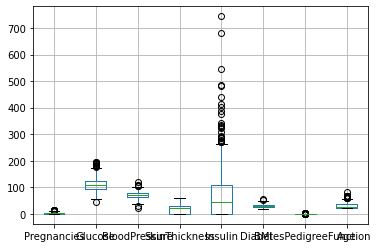

In [44]:
df_2_outcome_0_new.boxplot()
# it does not give clear representation since values of each variable is different

IndexError: index 8 is out of bounds for axis 0 with size 8

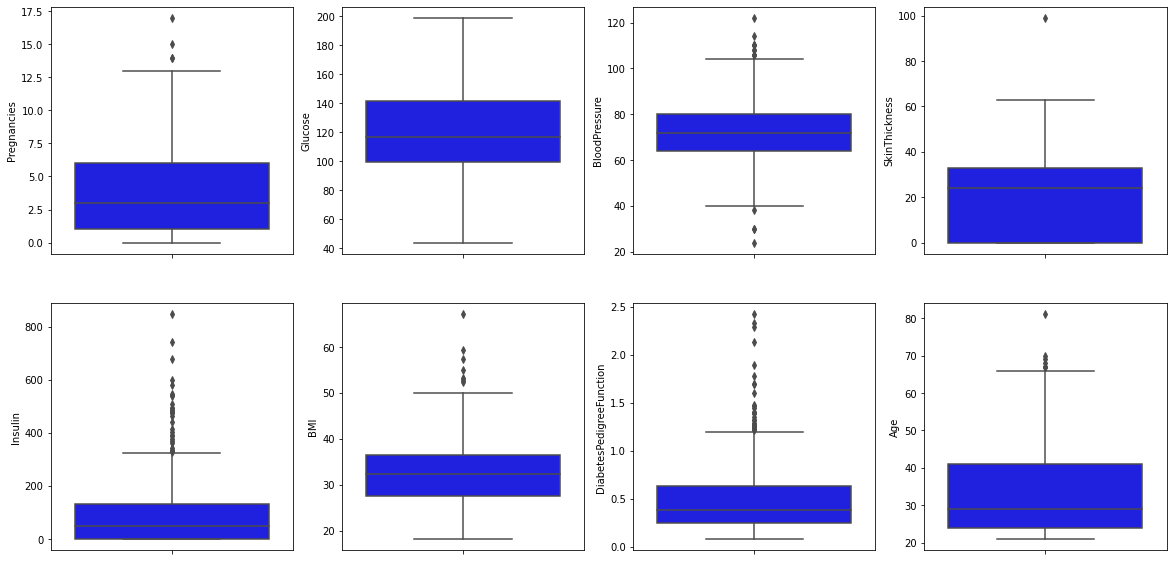

In [45]:
fig , ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
ax = ax.flatten()
index=0
for i in df_2.columns:
  sns.boxplot(y=i,data = df_2, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)#pad is dis bt edges of subplot

In [46]:
df_2.skew(axis=0,skipna=True)

Pregnancies                 0.905049
Glucose                     0.527117
BloodPressure               0.137629
SkinThickness               0.050349
Insulin                     2.200876
BMI                         0.598186
DiabetesPedigreeFunction    1.921533
Age                         1.088526
Outcome                     0.658511
dtype: float64

<AxesSubplot:>

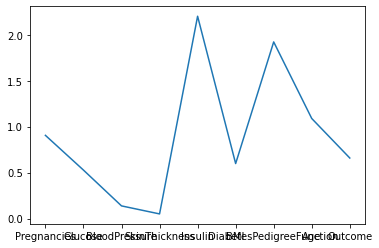

In [47]:
df_2.skew(axis=0,skipna=True).plot()

In [48]:
# we see that Pregnancies,Insulin,DiabetesPedigreeFunction are highly skewed . thus removing outliers

<AxesSubplot:xlabel='Insulin'>

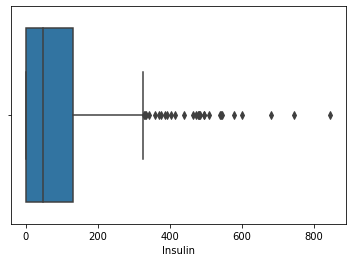

In [49]:
sns.boxplot(x=df_2.Insulin)

In [50]:
df_2=df_2.drop(df_2[df_2['Insulin']>300].index)

<AxesSubplot:xlabel='Insulin'>

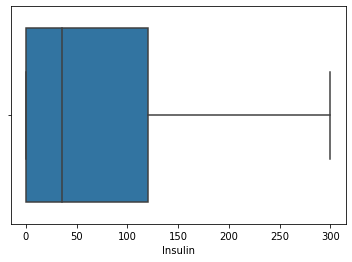

In [51]:
sns.boxplot(x=df_2.Insulin)

In [52]:
df_2=df_2.drop(df_2[df_2['DiabetesPedigreeFunction']>1.2].index)

<AxesSubplot:xlabel='BloodPressure'>

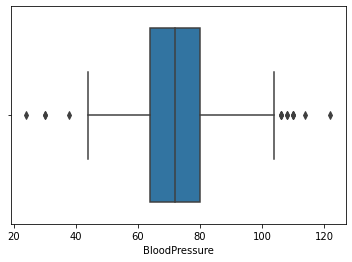

In [53]:
sns.boxplot(x = df_2.BloodPressure)

In [54]:
df_2=df_2.drop(df_2[(df_2['BloodPressure']<40) | (df_2['BloodPressure']>102)].index)

<AxesSubplot:xlabel='BloodPressure'>

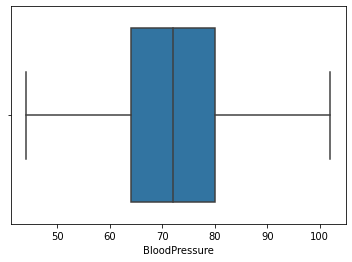

In [55]:
sns.boxplot(x=df_2.BloodPressure)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

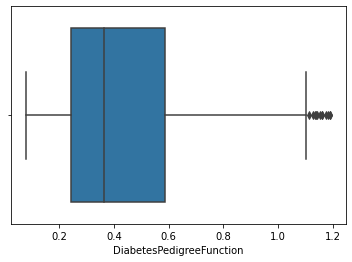

In [56]:
sns.boxplot(x=df_2.DiabetesPedigreeFunction)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

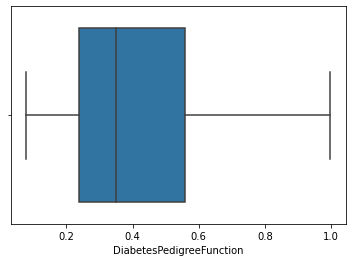

In [57]:
df_2=df_2.drop(df_2[df_2['DiabetesPedigreeFunction']>1].index)
sns.boxplot(df_2.DiabetesPedigreeFunction)

In [58]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

# Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [59]:
# model 1
from sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
features = df_2.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df_2.iloc[:,8].values

In [63]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=10)
lr.fit(x_train,y_train).score(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.796

In [64]:
print(lr.score(x_test,y_test))

0.816


f1=0.618 auc=0.719 ap=0.720


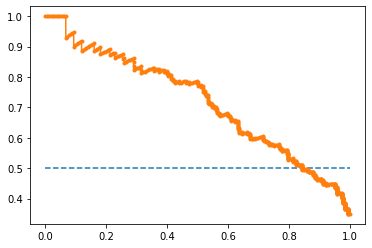

In [80]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = lr.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = lr.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label,lr.predict(features))
cm

array([[399,  33],
       [ 92, 101]])

In [66]:
from sklearn.metrics import classification_report
print(classification_report(label,lr.predict(features)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       432
           1       0.75      0.52      0.62       193

    accuracy                           0.80       625
   macro avg       0.78      0.72      0.74       625
weighted avg       0.79      0.80      0.79       625



AUC: 0.879
True Positive Rate - [0.         0.02590674 0.24870466 0.33160622 0.38341969 0.76683938
 0.78238342 0.79274611 0.87564767 0.9015544  0.93264249 0.98963731
 1.        ], False Positive Rate - [0.         0.         0.00231481 0.0162037  0.03472222 0.15972222
 0.16898148 0.17824074 0.26388889 0.3125     0.34722222 0.78240741
 1.        ] Thresholds - [2.         1.         0.97297297 0.76470588 0.61538462 0.60194175
 0.5        0.33333333 0.275      0.25       0.21428571 0.0443038
 0.        ]


Text(0, 0.5, 'True Positive Rate')

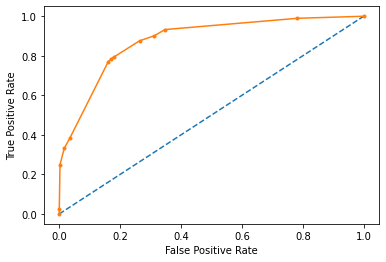

In [78]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [68]:
# model 2 Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
model2.score(x_train,y_train)

0.836

In [70]:
model2.score(x_test,y_test)

0.744

f1=0.722 auc=0.791 ap=0.746


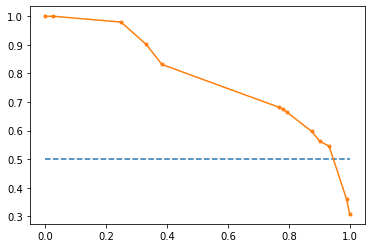

In [81]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [71]:
# model3 Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=11)
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=11)

In [72]:
model3.score(x_train,y_train)

0.996

In [73]:
model3.score(x_test,y_test)

0.784

f1=0.923 auc=0.966 ap=0.958


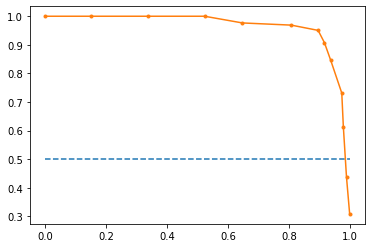

In [82]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [74]:
#model4 Support Vector Classifier

from sklearn.svm import SVC 
model4 = SVC(kernel='rbf',
           gamma='auto')
model4.fit(x_train,y_train)

SVC(gamma='auto')

In [75]:
model4.score(x_train,y_train)

1.0

In [76]:
model4.score(x_test,y_test)

0.696

In [77]:
# model5 Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

f1=0.619 auc=0.737 ap=0.688


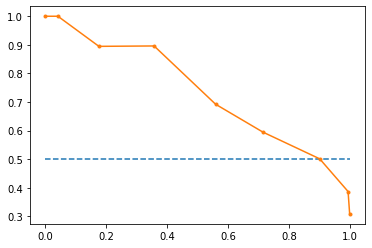

In [83]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model5.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model5.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')